In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [4]:
column_names = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate', 'RiskLevel']

In [5]:
dataset = pd.read_csv("maternal_health_risk_ds.csv", skiprows=1, names = column_names, sep = ",", skipinitialspace=True, low_memory=False)
dataset.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [6]:
print("#samples = ", dataset.shape[0])
print("#features = ", dataset.shape[1])

#samples =  1014
#features =  7


In [7]:
# searching missing values...
dataset[dataset.eq("?").any(axis=1)].head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel


In [8]:
def get_metadata(data):
    metadata = data.columns
    numerical_cols = data.select_dtypes(include = ["float64", "int64"]).columns.tolist()
    categorical_cols = data.select_dtypes(include = ["object"]).columns.tolist()
    print("Numerical features: ", numerical_cols)
    print("Categorical features: ", categorical_cols)
    return metadata, numerical_cols, categorical_cols

In [9]:
metadata, numeric_cols, categ_cols = get_metadata(dataset)

Numerical features:  ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']
Categorical features:  ['RiskLevel']


In [12]:
def hist_frequencies(data, column, bins):
    sbn.histplot(data[column], color = "blue", bins = bins)
    plt.xlabel(column)
    plt.ylabel("Frequencies")
    plt.title("Histogram distribution for " + column)
    plt.show()

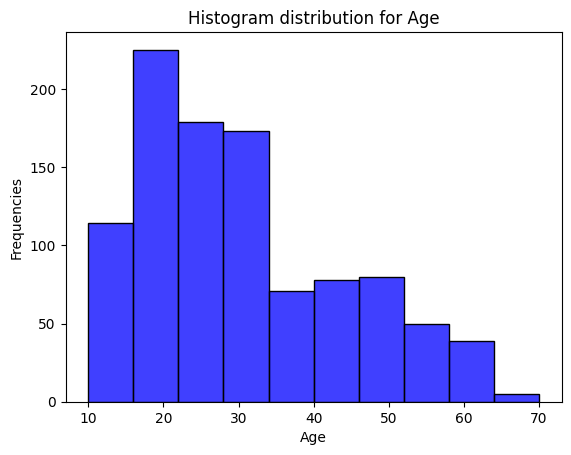

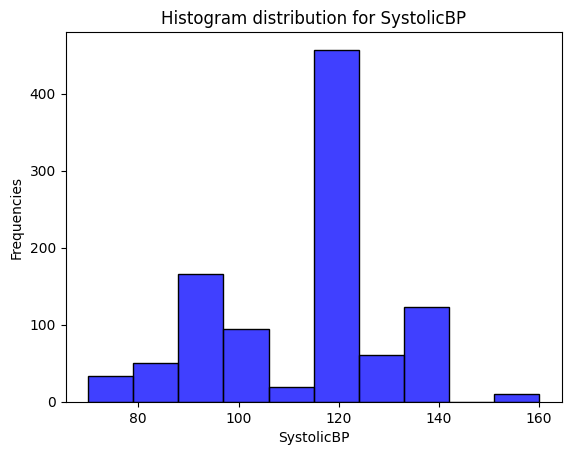

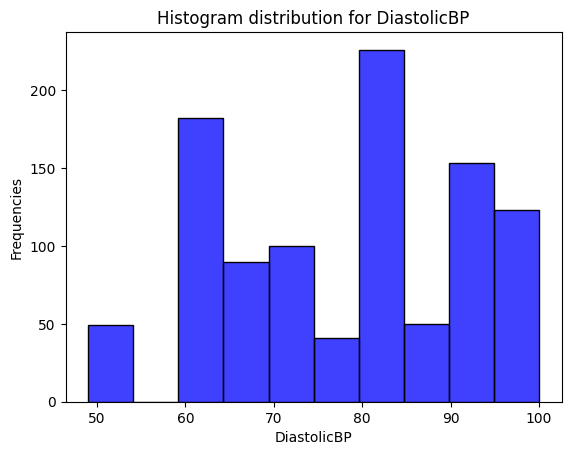

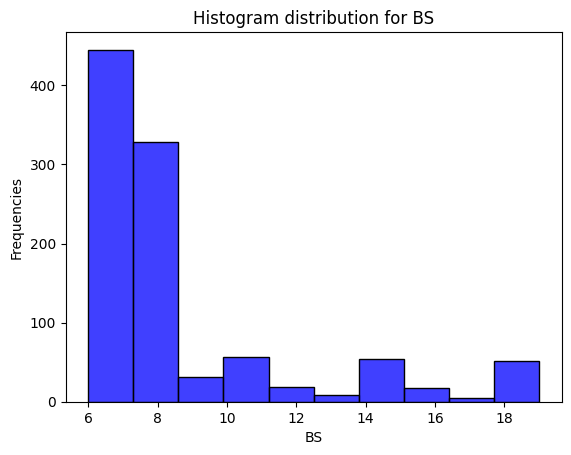

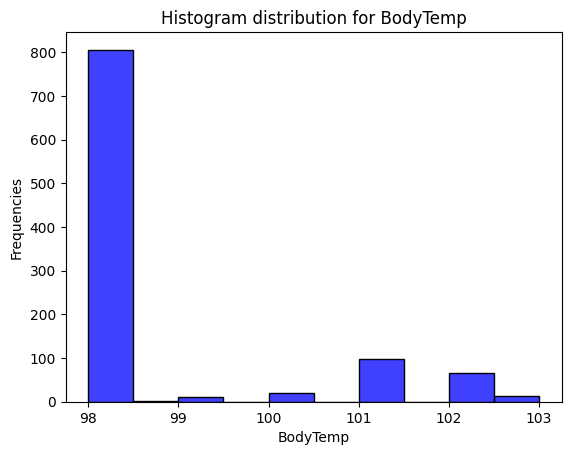

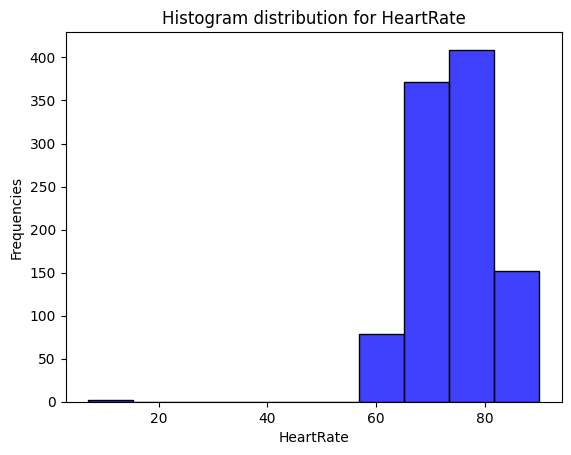

In [14]:
for col in numeric_cols:
    hist_frequencies(dataset, col, 10)

In [15]:
def hist_density(data, column, bins):
    sbn.histplot(data[column], color = "blue", bins = bins, kde = False, stat = "density", alpha = 0.5)
    sbn.kdeplot(data[column], color = "red", linewidth = 2)
    plt.xlabel(column)
    plt.ylabel("Density")
    plt.title("Histogram and KDE for " + column)
    plt.show()

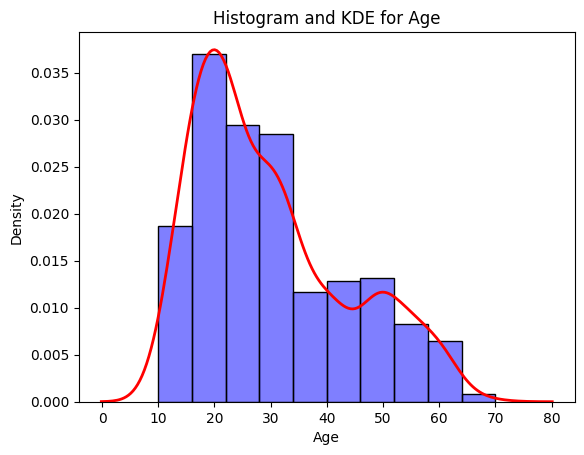

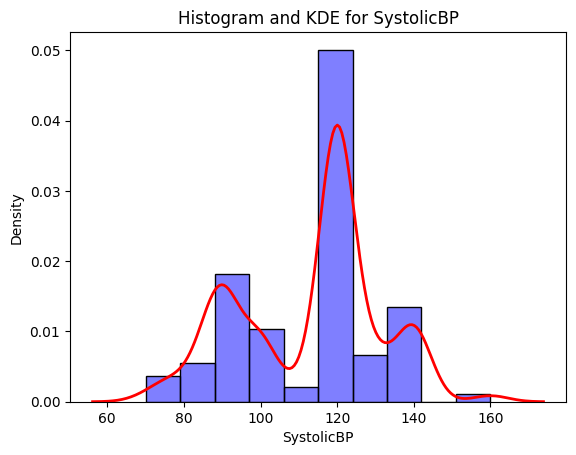

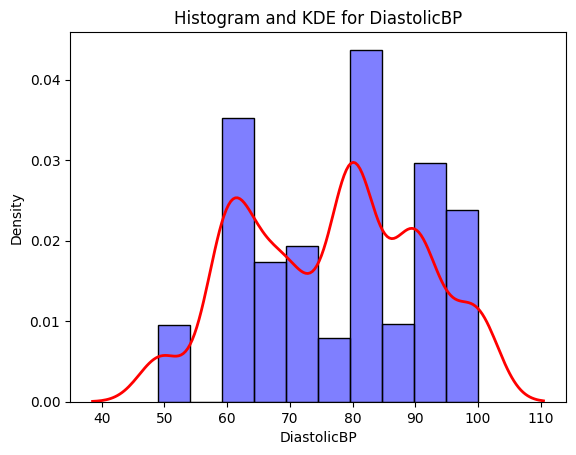

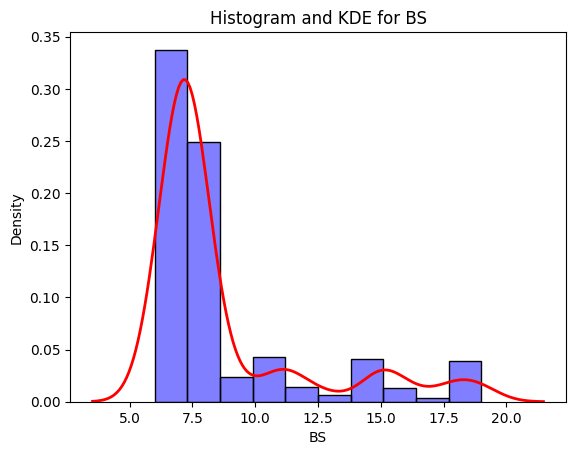

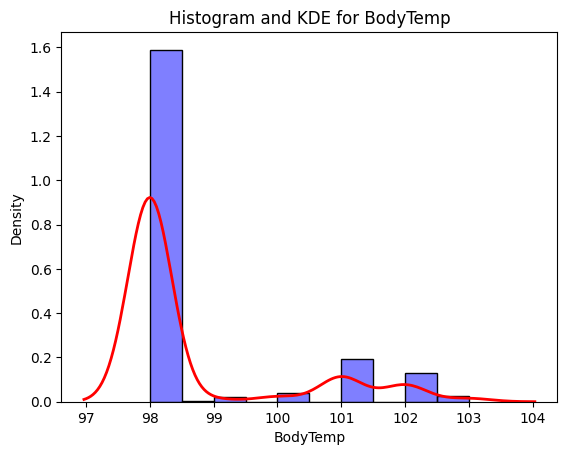

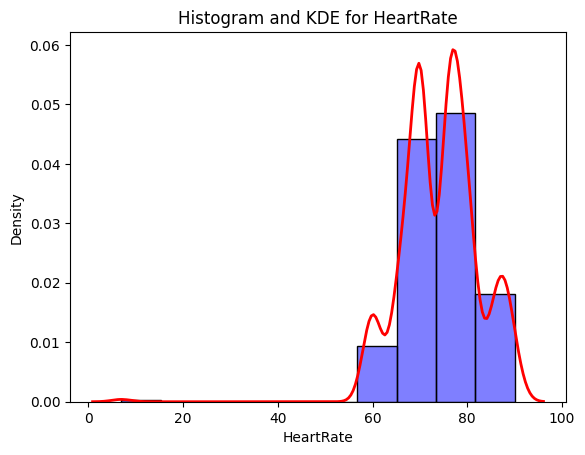

In [16]:
for col in numeric_cols:
    hist_density(dataset, col, 10)

In [17]:
def statistics_nvar(data, numerical_cols):
    # calculate the nrows and ncols for plots
    ncol_plots = 2
    nrow_plots = (len(numerical_cols) + ncol_plots - 1) // ncol_plots
    # create the subplots for specific row and column
    fig, axs = plt.subplots(nrow_plots, ncol_plots, figsize = (16, 4 * nrow_plots))
    axs = axs.flatten()
    # create boxplots for each numerical column
    for i, col in enumerate(numerical_cols):
        sbn.boxplot(data[col], ax = axs[i])
        axs[i].set_title("Box plot for " + col)
    plt.tight_layout()
    plt.show()

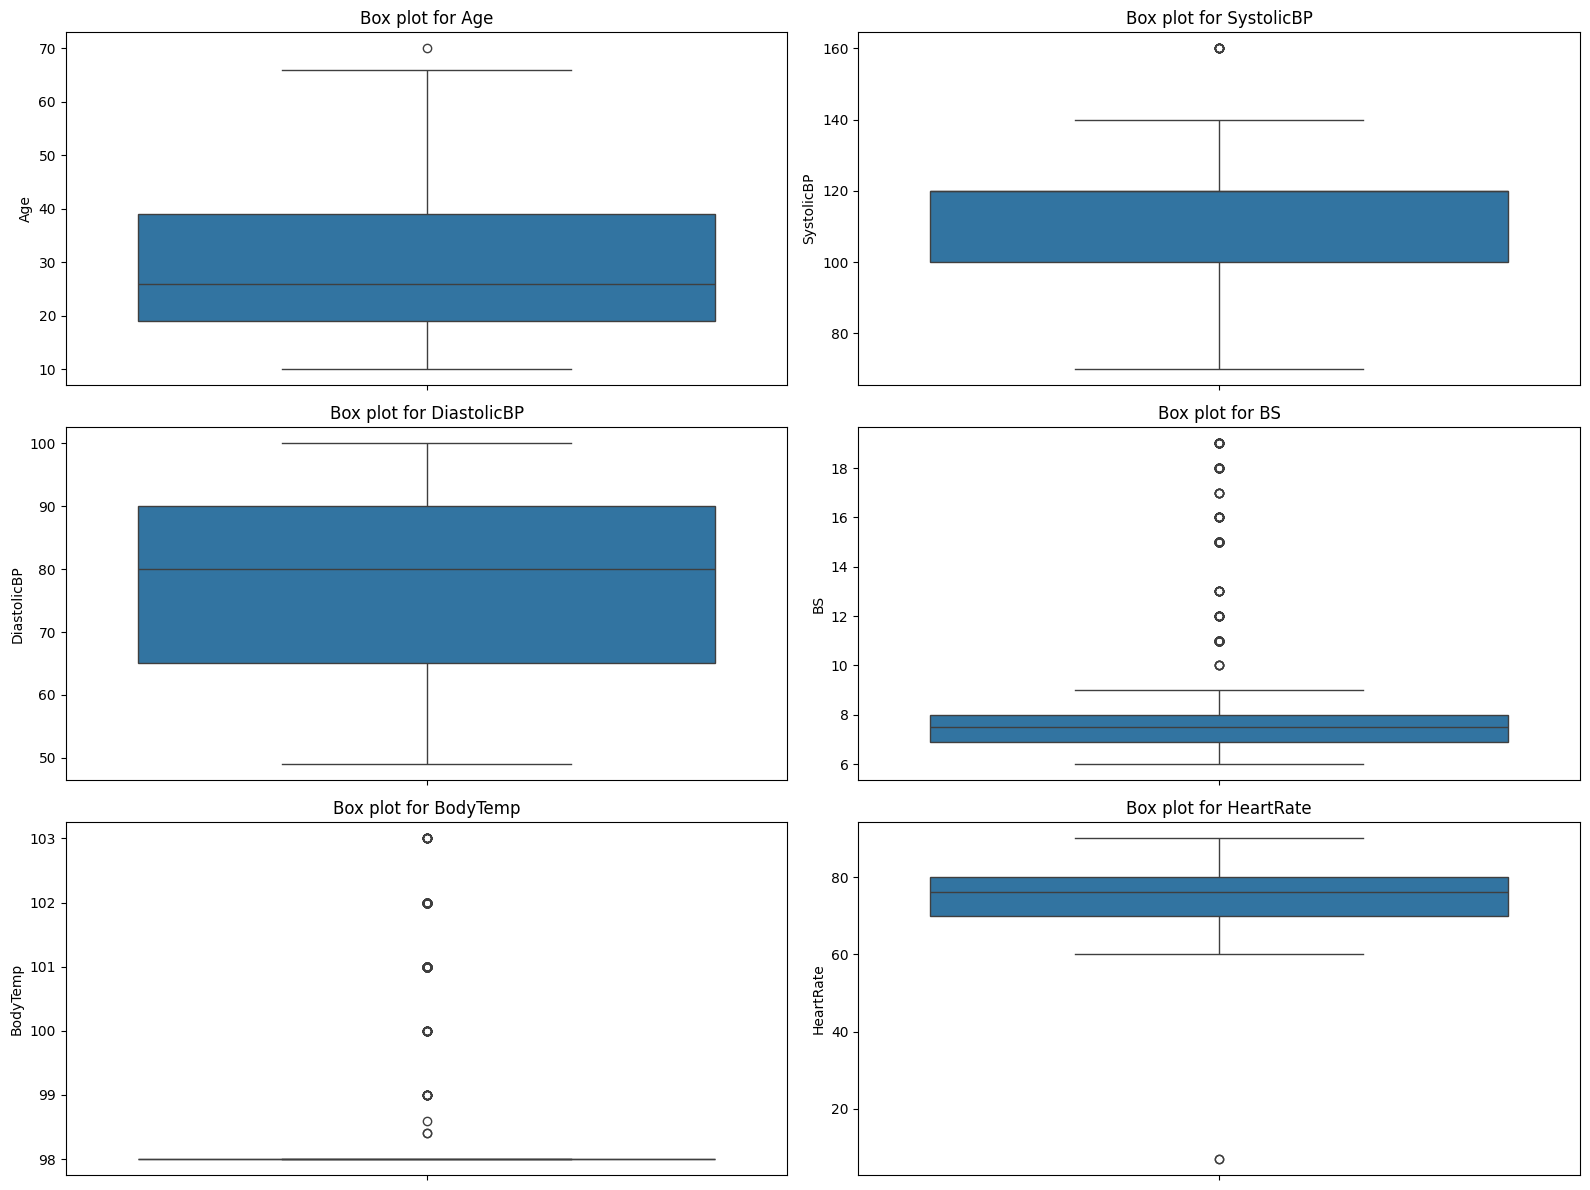

In [18]:
statistics_nvar(dataset, numeric_cols)

In [19]:
# statistical information about numerical variables
dataset[numeric_cols].describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [20]:
# function to plot correlation between numerical variables
def plot_correlation(data, cols):
    corr = data[cols].corr()
    plt.matshow(corr, cmap = "coolwarm")
    plt.xticks(range(len(cols)), cols, rotation = 90)
    plt.yticks(range(len(cols)), cols)

    # add the correlation values in each cell
    for (i, j), val in np.ndenumerate(corr):
        plt.text(j, i, f"{val:.1f}", ha='center', va='center', color='black')
    plt.title("Correlation Analysis")
    plt.colorbar()
    plt.show()

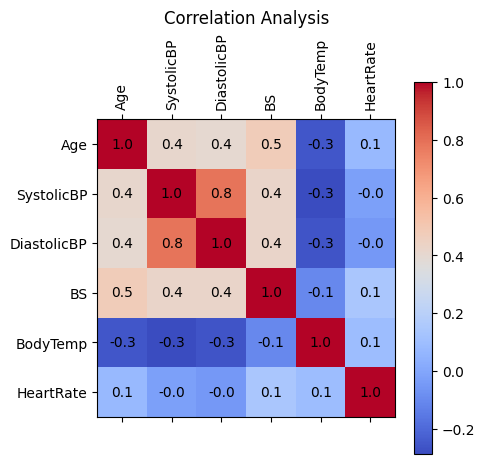

In [21]:
plot_correlation(dataset, numeric_cols)

In [22]:
from scipy import stats

# Function for outliers detection based on percentiles
def outliers_detection(dataset, col, lower_percentile=2.275, upper_percentile=97.725):
    lower_bound = dataset[col].quantile(lower_percentile / 100)
    upper_bound = dataset[col].quantile(upper_percentile / 100)
    # Filter out the outliers
    outliers = dataset[(dataset[col] < lower_bound) | (dataset[col] > upper_bound)]
    return outliers

In [23]:
for col in numeric_cols:
    print("\n*** Outliers detection in " + col + " ***")
    lst_outliers = outliers_detection(dataset, col)
    print(f"#samples outlier to distribution = {len(lst_outliers)}")
    print(f"%outliers = {round(100* len(lst_outliers)/len(dataset), 2)} %")


*** Outliers detection in Age ***
#samples outlier to distribution = 12
%outliers = 1.18 %

*** Outliers detection in SystolicBP ***
#samples outlier to distribution = 25
%outliers = 2.47 %

*** Outliers detection in DiastolicBP ***
#samples outlier to distribution = 0
%outliers = 0.0 %

*** Outliers detection in BS ***
#samples outlier to distribution = 43
%outliers = 4.24 %

*** Outliers detection in BodyTemp ***
#samples outlier to distribution = 13
%outliers = 1.28 %

*** Outliers detection in HeartRate ***
#samples outlier to distribution = 21
%outliers = 2.07 %


In [24]:
for col in categ_cols:
    print("\n***** " + col + " ******")
    print(dataset[col].value_counts())


***** RiskLevel ******
RiskLevel
low risk     406
mid risk     336
high risk    272
Name: count, dtype: int64


In [25]:
# function to plot bar chart for absolute frequencies in 1 categorical column
def plot_barchart(dataset, col):
    results = dataset[col].value_counts()
    plt.figure(figsize=(10, len(results) * 0.5))
    sbn.barplot(x = results.values.tolist(), y = results.index.tolist(), orient = "y")
    plt.title("Statistical analysis by " + col)
    plt.show()

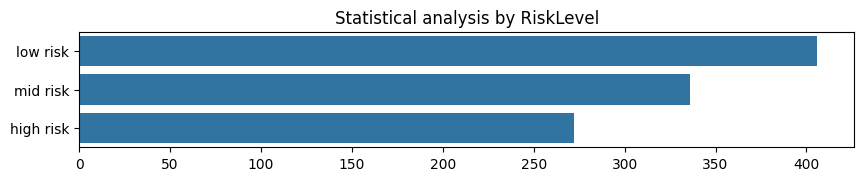

In [26]:
for col in categ_cols:
    plot_barchart(dataset, col)

In [27]:
# function to plot pie chart for relative frequencies in 1 categorical column
def plot_piechart(dataset, col):
    # count the #samples for each categogy
    results = dataset[col].value_counts()
    # calculate the relative frequencies
    total_samples = results.sum()
    rel_freq = results/total_samples
    sbn.set_style("whitegrid")
    plt.figure(figsize=(6,6))
    plt.pie(rel_freq.values.tolist(), labels = rel_freq.index.tolist(), autopct='%1.1f%%')
    plt.title("Relative frequency analysis by " + col)
    plt.show()

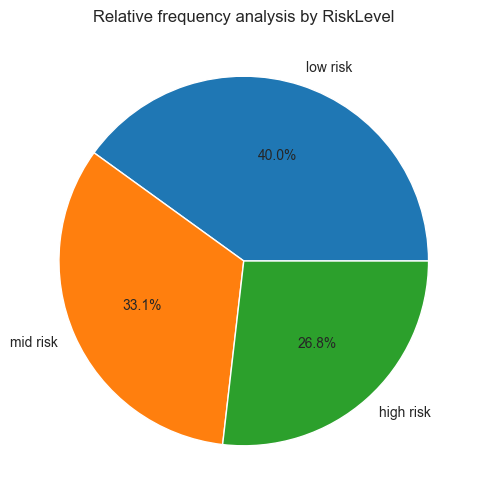

In [28]:
for col in categ_cols:
    plot_piechart(dataset, col)

In [41]:
# create groups organized by bs and risk category
dataset['AgeGroup'] = pd.cut(dataset['Age'], bins=[0, 40, float('inf')], labels=['age <= 40', 'age > 40'])
group_age_risk = dataset.groupby(['AgeGroup', 'RiskLevel']).size().reset_index(name='samples')

C:\Users\Dim\AppData\Local\Temp\ipykernel_6396\2632850230.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_age_risk = dataset.groupby(['AgeGroup', 'RiskLevel']).size().reset_index(name='samples')


In [42]:
print(group_age_risk)

    AgeGroup  RiskLevel  samples
0  age <= 40  high risk      186
1  age <= 40   low risk      335
2  age <= 40   mid risk      278
3   age > 40  high risk       86
4   age > 40   low risk       71
5   age > 40   mid risk       58


In [46]:
# function to plot absolute frequencies for groups
def plot_absfreq_groups(group, g1, g2):
    sbn.barplot(data = group, x = g1, y = "samples", hue = g2, palette = "bright")
    plt.xlabel('Age')
    plt.ylabel('Absolute Frequencies')
    plt.title('Bar Chart of Absolute Frequencies by Age and Risk')
    plt.tight_layout()
    plt.show()

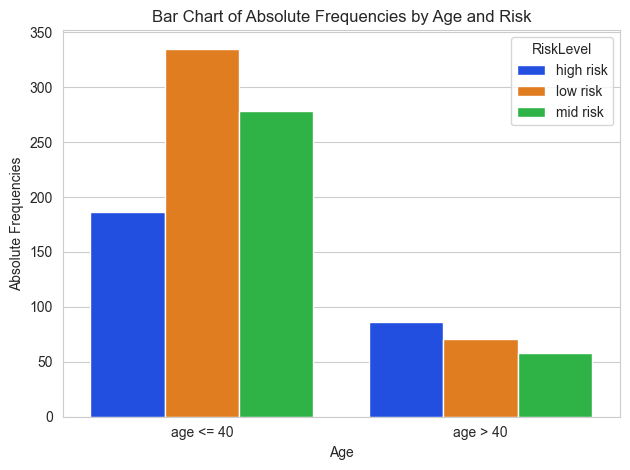

In [47]:
plot_absfreq_groups(group_age_risk, 'AgeGroup', 'RiskLevel')

C:\Users\Dim\AppData\Local\Temp\ipykernel_6396\3088142755.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group = group.groupby([g1, g2]).sum().reset_index()


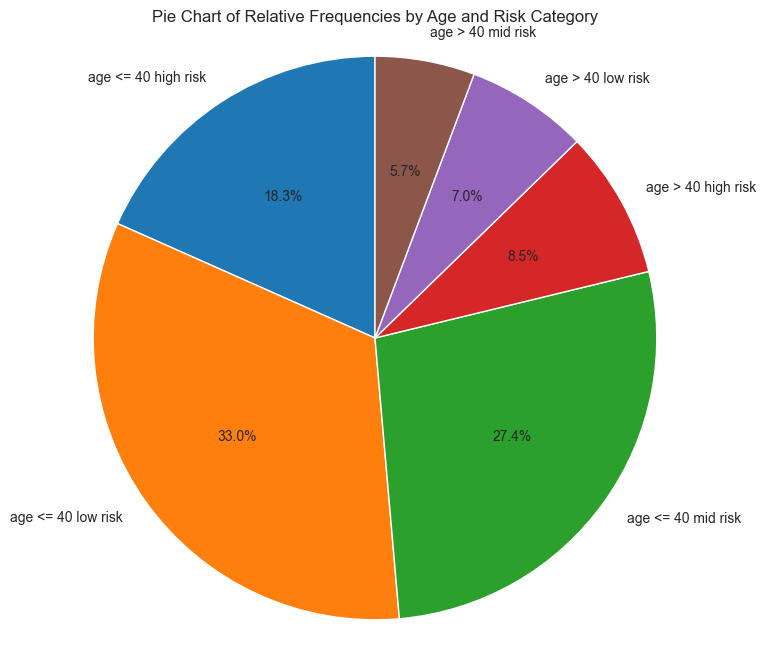

In [58]:
def plot_relfreq_groups(group, g1, g2):
    group = group.groupby([g1, g2]).sum().reset_index()
    
    labels = group[g1].astype(str) + ' ' + group[g2].astype(str)
    sizes = group["samples"]
    
    plt.figure(figsize=(8, 8))  
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')  
    plt.title('Pie Chart of Relative Frequencies by Age and Risk Category')
    plt.show()

plot_relfreq_groups(group_age_risk, 'AgeGroup', 'RiskLevel')